In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load data

In [206]:
df=pd.read_excel('appdata.xlsx') 


In [207]:
df.isnull().sum()

timeElapsed    0
x              0
y              0
z              0
label          0
dtype: int64

In [208]:
df.duplicated().sum()

0

In [209]:
df.shape

(817807, 5)

In [210]:
df['label'].unique()

array(['Sitting', 'Standing', 'Walking', 'Upstairs', 'Downstairs'],
      dtype=object)

In [211]:
df['label'].value_counts()

Walking       240200
Sitting       213235
Upstairs      149859
Standing      116422
Downstairs     98091
Name: label, dtype: int64

## Plot Axies of Accelerometer Dataset 

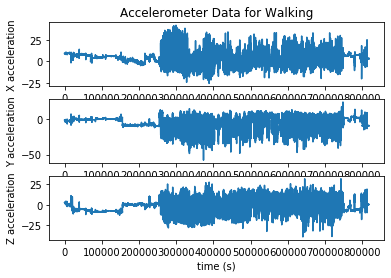

<Figure size 720x720 with 0 Axes>

In [212]:
plt.subplot(3, 1, 1)
plt.plot(df['timeElapsed'],df['x'])
plt.title('Accelerometer Data for Walking')
plt.ylabel('X acceleration')
plt.xlabel('time (s)')

plt.subplot(3, 1, 2)
plt.plot(df['timeElapsed'],df['y'])
plt.xlabel('time (s)')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(df['timeElapsed'],df['z'])
plt.xlabel('time (s)')
plt.ylabel('Z acceleration')

plt.figure(figsize=(10,10))

plt.show();

# Preprocessing Phase


### Applying Low-Pass Filter to Acceleration Signals

In [213]:
X_acc=df['x'].values
Y_acc=df['y'].values
Z_acc=df['z'].values


In [214]:
def Filter (Data):
        a=0.5  # Cofficient of filter
        S=list(Data)  #convert acc data to list
        X=[]          #empty list to append filter data in it
        for i in range(0,len(S)):
            if i==0:
                X.append(a*S[i]) 
            else:
                X.append((1-a)*X[i-1]+a*S[i]) 
        return(X)


In [215]:
X_filtered=Filter(X_acc)
Y_filtered=Filter(Y_acc)
Z_filtered=Filter(Z_acc)

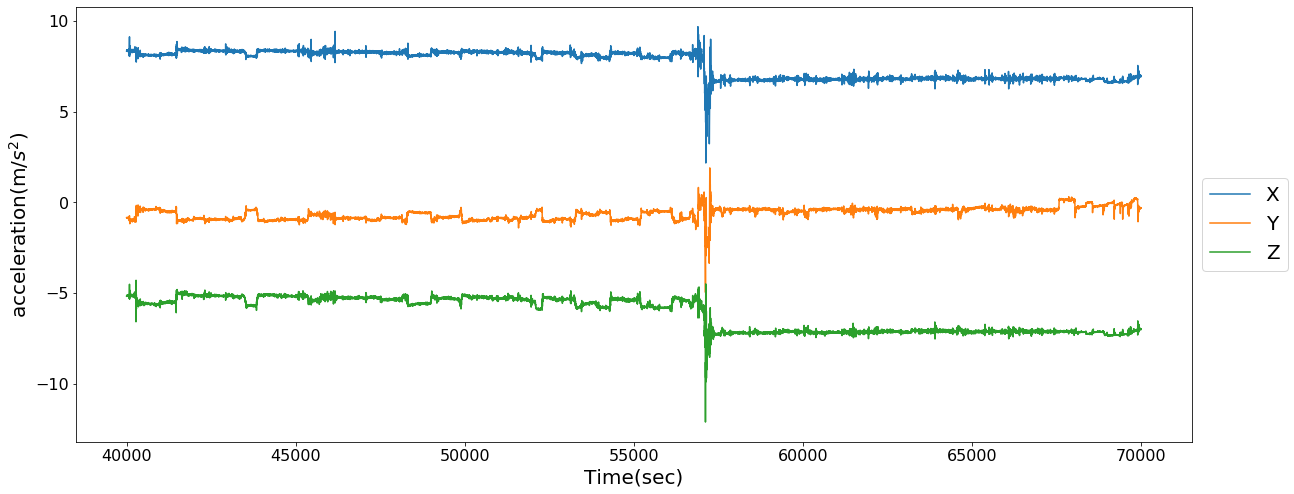

In [216]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'].iloc[40000:70000],df['x'].iloc[40000:70000],label='X')
plt.plot(df['timeElapsed'].iloc[40000:70000],df['y'].iloc[40000:70000],label='Y')
plt.plot(df['timeElapsed'].iloc[40000:70000],df['z'].iloc[40000:70000],label='Z')
# plt.title('X Data Before and After Filteration',color='m',fontsize=30)
plt.ylabel('acceleration(m/$s^{2}$)',fontsize=20)
plt.xlabel('Time(sec)',fontsize=20)
plt.xticks(fontsize=16,color='black')
plt.yticks(fontsize=16,color='black')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.savefig('acc.png')
plt.show()


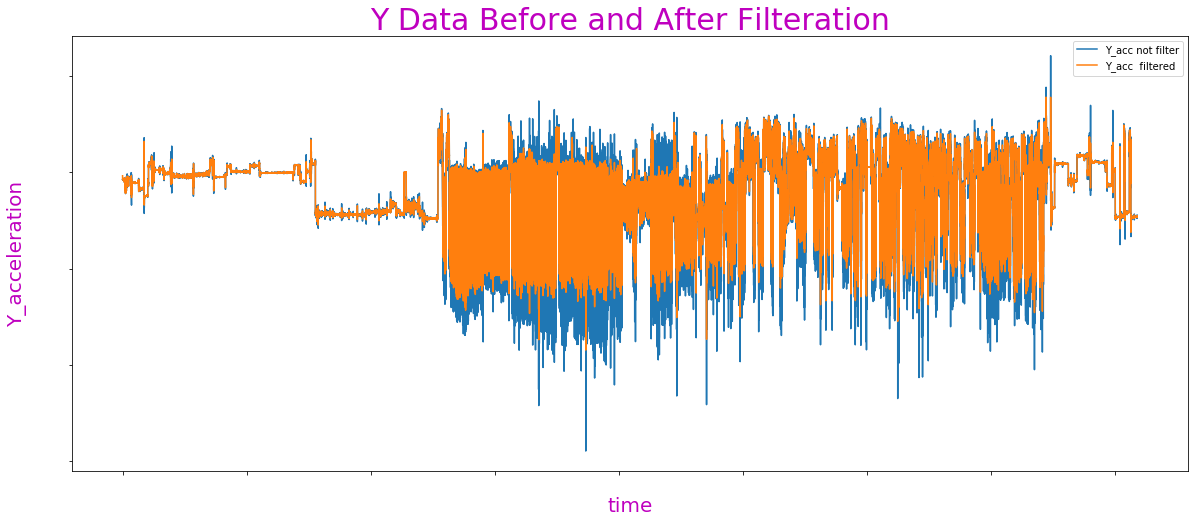

In [217]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['y'],label='Y_acc not filter')
plt.plot(df['timeElapsed'],Y_filtered,label='Y_acc  filtered')
plt.title('Y Data Before and After Filteration',color='m',fontsize=30)
plt.ylabel('Y_acceleration',color='m',fontsize=20)
plt.xlabel('time',color='m',fontsize=20)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()

plt.show()

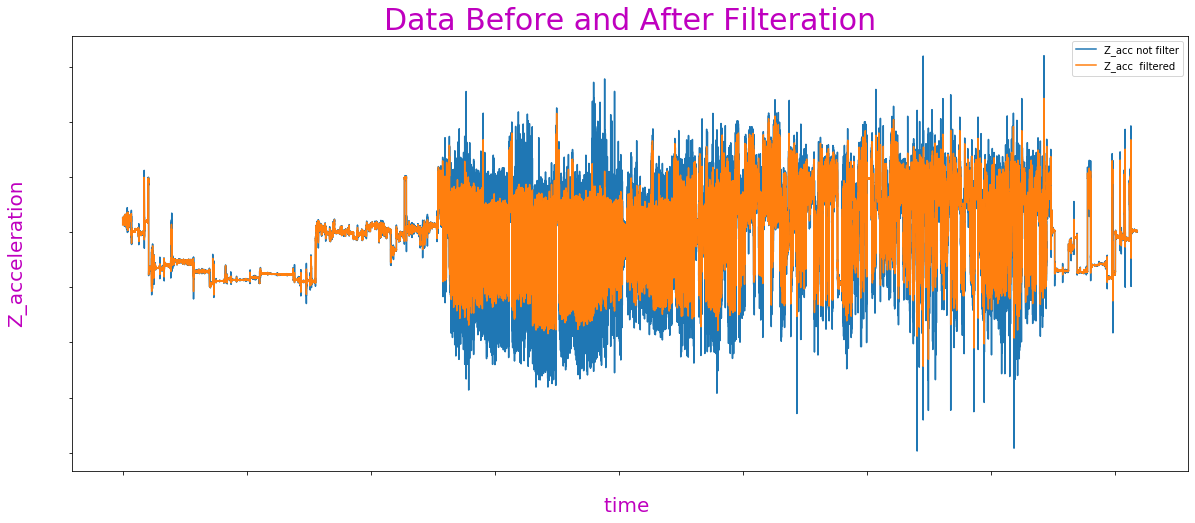

In [218]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['z'],label='Z_acc not filter')
plt.plot(df['timeElapsed'],Z_filtered,label='Z_acc  filtered')
plt.title('Data Before and After Filteration',color='m',fontsize=30)
plt.ylabel('Z_acceleration',color='m',fontsize=20)
plt.xlabel('time ',color='m',fontsize=20)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()

### Apply smoothing to data

In [219]:
from scipy.ndimage import gaussian_filter1d
X_smoothed = gaussian_filter1d(X_filtered, 8)
Y_smoothed = gaussian_filter1d(Y_filtered, 8)
Z_smoothed = gaussian_filter1d(Z_filtered, 8)


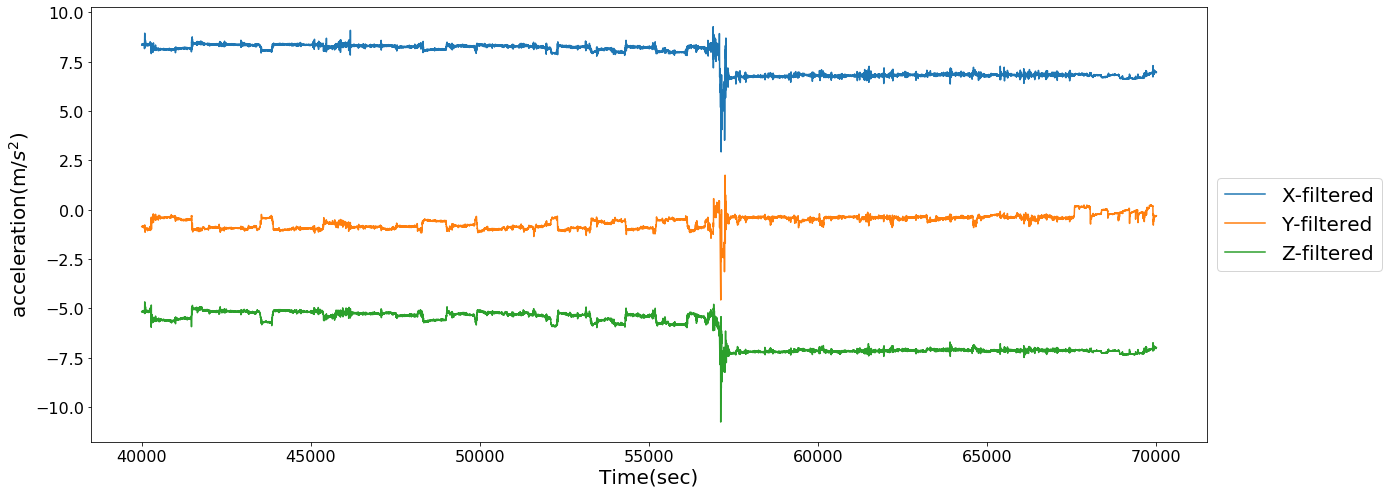

In [220]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'].iloc[40000:70000],X_filtered[40000:70000],label='X-filtered')
plt.plot(df['timeElapsed'].iloc[40000:70000],Y_filtered[40000:70000],label='Y-filtered')
plt.plot(df['timeElapsed'].iloc[40000:70000],Z_filtered[40000:70000],label='Z-filtered')
plt.ylabel('acceleration(m/$s^{2}$)',fontsize=20)
plt.xlabel('Time(sec)',fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('filter.png')
plt.show()

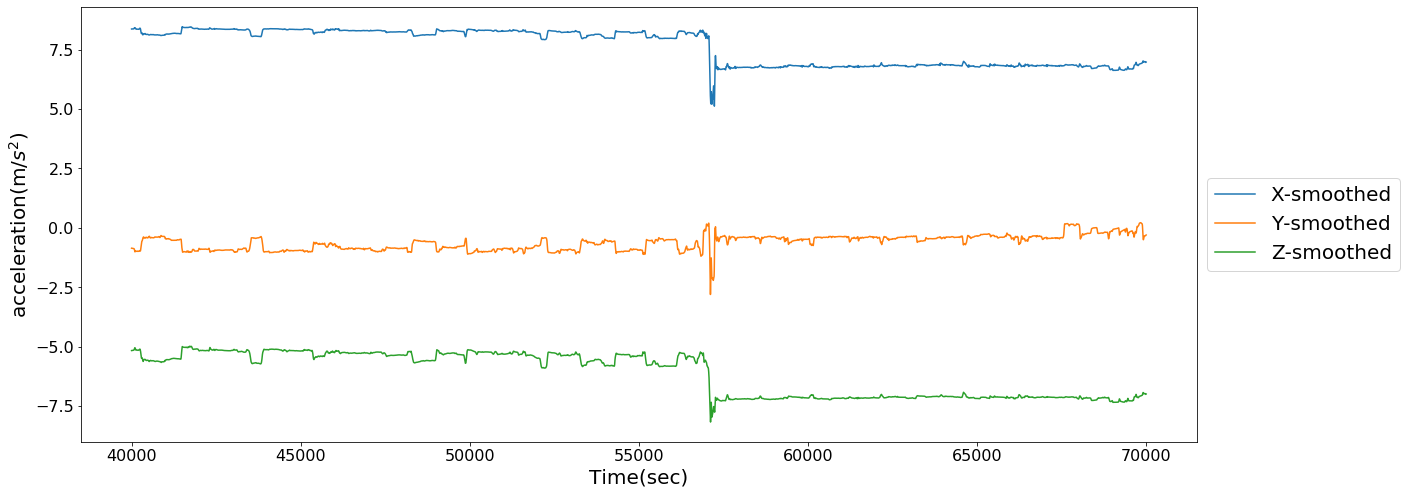

In [221]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'].iloc[40000:70000],X_smoothed[40000:70000],label='X-smoothed')
plt.plot(df['timeElapsed'].iloc[40000:70000],Y_smoothed[40000:70000],label='Y-smoothed')
plt.plot(df['timeElapsed'].iloc[40000:70000],Z_smoothed[40000:70000],label='Z-smoothed')
# plt.title('Accelerometer axies smoothed signal',color='c',fontsize=30)
plt.ylabel('acceleration(m/$s^{2}$)',fontsize=20)
plt.xlabel('Time(sec)',fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('smoothed.png')
plt.show()

In [222]:
df['X_smoothed']=X_smoothed
df['Y_smoothed']=Y_smoothed
df['Z_smoothed']=Z_smoothed
df.head()

,timeElapsed,x,y,z,label,X_smoothed,Y_smoothed,Z_smoothed
0,0,9.38,-1.48,2.62,Sitting,8.476143,-1.352952,2.368253
1,1,9.37,-1.47,2.64,Sitting,8.489393,-1.355144,2.371904
2,2,9.39,-1.49,2.64,Sitting,8.515312,-1.359427,2.379049
3,3,9.37,-1.49,2.62,Sitting,8.552780,-1.365611,2.389385
4,4,9.38,-1.50,2.62,Sitting,8.600221,-1.373425,2.402484


### Window Technique and Feature Extraction

In [223]:
x_list = []
y_list = []
z_list = []
train_labels = []

window_size = 100
step_size = 50

# creating overlaping windows of size window-size 100
for i in range(0, df.shape[0] - window_size, step_size):
    xs = df['X_smoothed'].values[i: i + 100]
    ys = df['Y_smoothed'].values[i: i + 100]
    zs = df['Z_smoothed'].values[i: i + 100]
    label = stats.mode(df['label'][i: i + 100])[0][0]

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    train_labels.append(label)

# Statistical Features on raw x, y and z in time domain
X_train = pd.DataFrame()

# mean
X_train['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_train['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_train['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_train['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_train['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_train['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_train['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_train['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_train['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_train['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_train['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_train['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_train['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_train['x_maxmin_diff'] = X_train['x_max'] - X_train['x_min']
X_train['y_maxmin_diff'] = X_train['y_max'] - X_train['y_min']
X_train['z_maxmin_diff'] = X_train['z_max'] - X_train['z_min']

# median
X_train['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_train['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_train['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_train['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_train['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_train['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_train['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_train['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_train['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_train['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_train['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_train['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_train['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_train['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_train['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_train['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_train['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_train['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/100)
X_train['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/100)
X_train['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/100))

# avg resultant
X_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_train['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/100))

In [224]:
# converting the signals from time domain to frequency domain using FFT
x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_train['x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_train['y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
X_train['z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())

# FFT std dev
X_train['x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_train['y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
X_train['z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())

# FFT avg absolute diff
X_train['x_aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# FFT min
X_train['x_min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
X_train['y_min_fft'] = pd.Series(y_list_fft).apply(lambda x: x.min())
X_train['z_min_fft'] = pd.Series(z_list_fft).apply(lambda x: x.min())

# FFT max
X_train['x_max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
X_train['y_max_fft'] = pd.Series(y_list_fft).apply(lambda x: x.max())
X_train['z_max_fft'] = pd.Series(z_list_fft).apply(lambda x: x.max())

# FFT max-min diff
X_train['x_maxmin_diff_fft'] = X_train['x_max_fft'] - X_train['x_min_fft']
X_train['y_maxmin_diff_fft'] = X_train['y_max_fft'] - X_train['y_min_fft']
X_train['z_maxmin_diff_fft'] = X_train['z_max_fft'] - X_train['z_min_fft']

# FFT median
X_train['x_median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
X_train['y_median_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(x))
X_train['z_median_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(x))

# FFT median abs dev 
X_train['x_mad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range
X_train['x_IQR_fft'] = pd.Series(x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR_fft'] = pd.Series(y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR_fft'] = pd.Series(z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
X_train['x_above_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
X_train['x_peak_count_fft'] = pd.Series(x_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count_fft'] = pd.Series(y_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count_fft'] = pd.Series(z_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
X_train['x_skewness_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.skew(x))
X_train['y_skewness_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.skew(x))
X_train['z_skewness_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.skew(x))

# FFT kurtosis
X_train['x_kurtosis_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.kurtosis(x))

# FFT energy
X_train['x_energy_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x**2)/50)
X_train['y_energy_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x**2)/50)
X_train['z_energy_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x**2/50))

# FFT avg resultant
X_train['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft)**2 + pd.Series(y_list_fft)**2 + pd.Series(z_list_fft)**2)**0.5)]

# FFT Signal magnitude area
X_train['sma_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(abs(x)/50)) + pd.Series(y_list_fft).apply(lambda x: np.sum(abs(x)/50)) \
                     + pd.Series(z_list_fft).apply(lambda x: np.sum(abs(x)/50))

In [225]:
X_train.head()

,x_mean,y_mean,z_mean,x_std,y_std,z_std,x_aad,y_aad,z_aad,x_min,...,y_skewness_fft,z_skewness_fft,x_kurtosis_fft,y_kurtosis_fft,z_kurtosis_fft,x_energy_fft,y_energy_fft,z_energy_fft,avg_result_accl_fft,sma_fft
0,9.288518,-1.479558,2.588589,0.226842,0.034955,0.061241,0.148579,0.022320,0.039465,8.476143,...,2.558912,3.086945,7.523254,5.707497,9.260531,5.147815,0.122244,0.375171,1.426000,1.936137
1,9.383958,-1.498014,2.606405,0.001337,0.006855,0.009347,0.001228,0.005785,0.007679,9.381921,...,6.159345,4.692132,17.245127,38.207822,22.880771,0.000179,0.004699,0.008737,0.041529,0.060630
2,9.384700,-1.497560,2.602385,0.000942,0.006029,0.006694,0.000783,0.004788,0.005270,9.382575,...,4.698511,4.136674,19.858546,24.144843,17.781712,0.000089,0.003635,0.004481,0.041424,0.060821
3,9.384901,-1.491815,2.603798,0.000520,0.004485,0.004462,0.000418,0.003673,0.003761,9.384038,...,3.958796,3.929249,19.478818,15.188423,16.049806,0.000027,0.002012,0.001991,0.032310,0.047337
4,9.386097,-1.499781,2.594807,0.001639,0.011125,0.012539,0.001496,0.010186,0.011462,9.383858,...,6.790329,6.469986,32.844586,44.405947,41.329799,0.000268,0.012376,0.015723,0.035848,0.053078


In [226]:
df_New=X_train


In [227]:
X=X_train
y=np.array(train_labels)

In [228]:
X.shape

(16355, 94)

In [229]:
y.shape

(16355,)

# Classification Phase


### Splitting data to train and test

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

During train uncomment this cell

In [231]:
print('X_train_shape ---->',X_train.shape)
print('X_test_shape ---->',X_test.shape)
print('Y_train_shape ---->',y_train.shape)
print('Y_test_shape ---->',y_test.shape)

X_train_shape ----> (13084, 94)
X_test_shape ----> (3271, 94)
Y_train_shape ----> (13084,)
Y_test_shape ----> (3271,)


During train uncomment this cell

### Preprocessimg label data and feature

In [232]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_labeled=le.fit_transform(y_train)
y_labeled_test=le.transform(y_test)
Y_all=le.transform(y)


In [233]:
z=le.inverse_transform(np.unique(y_labeled))


In [234]:
z

array(['Downstairs', 'Sitting', 'Standing', 'Upstairs', 'Walking'],
      dtype='<U10')

In [235]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc=StandardScaler()
x_Scaler_train=sc.fit_transform(X_train)
x_Scaler_test=sc.transform(X_test)
X_all=sc.transform(X)


### Using Support vector machine Classification

In [236]:
from sklearn.svm import SVC
classifier_SVC=SVC(kernel = 'rbf')
classifier_SVC.fit(x_Scaler_train,y_labeled)
cv_svm_train = cross_val_score(classifier_SVC , X_all , Y_all, cv = 3)
print("Cross validation for train data SVC is : ",round(cv_svm_train.mean(),3))




Cross validation for train data SVC is :  0.716


During train uncomment this cell

Confusion matrix is :
  [[231   2   1 140   7]
 [  3 830  13  35   1]
 [  0   1 442  14   1]
 [ 49   3   5 491  35]
 [ 38   0   0  67 862]]


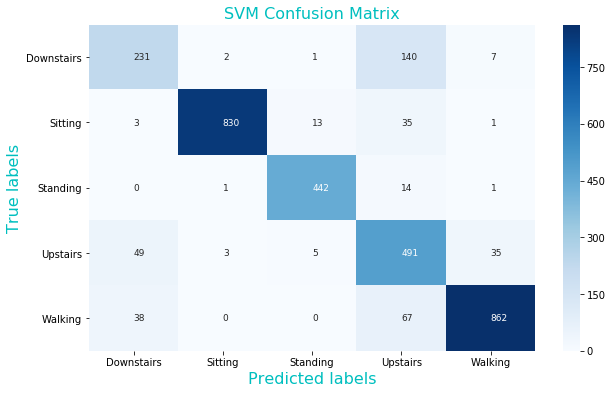

In [237]:
y_pred_SVC=classifier_SVC.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test,y_pred_SVC)
print("Confusion matrix is :\n ", cm)

annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('SVM Confusion Matrix',fontsize=16,color='c'); 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10,rotation=0)
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);



### Showing Accuracy using accuracy_score

In [238]:
from sklearn.metrics import  accuracy_score

print('Accuracy of SVC          --------->',round(accuracy_score(y_labeled_test, y_pred_SVC),2))


Accuracy of SVC          ---------> 0.87
